
## SMS Spam Classification
#### This notebook illustrates classification of SMS as SPAM or NOT SPAM.

###  Installing Dependicies

In [99]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Preprocessing and Exploring the Dataset
####  Importing the Dataset spam.csv

In [100]:
# reading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

In [101]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
Null_Columns = data.columns[data.isnull().any()]

In [104]:
Total_Sum_Of_Values_In_Null_Columns = data[Null_Columns].isnull().sum()
Total_Sum_Of_Values_In_Null_Columns

Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Removing unwanted columns

In [105]:
data = data.drop(Null_Columns,axis=1)  #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

In [106]:
len(data['v2'].unique())

5169

In [107]:
data['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [108]:
data.drop_duplicates(subset =["v1","v2"],keep = 'first', inplace = True) 

In [109]:
data.shape

(5169, 2)

In [110]:
data = data.rename(columns={'v1': 'class', 'v2': 'text'})

In [111]:
data['class'].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

In [112]:
spam_data_count = data['class'].value_counts()[1]
nonspam_data_count = data['class'].value_counts()[0]
total_data_count = data['class'].value_counts().sum()


In [113]:
print('Percentage of spam messages in data is : {:.2f} %'.format((spam_data_count/total_data_count)*100))
print('Percentage of Non spam messages in data is : {:.2f} %'.format((nonspam_data_count/total_data_count)*100))

Percentage of spam messages in data is : 12.63 %
Percentage of Non spam messages in data is : 87.37 %


### Visualisations

Text(0, 0.5, 'Frequency')

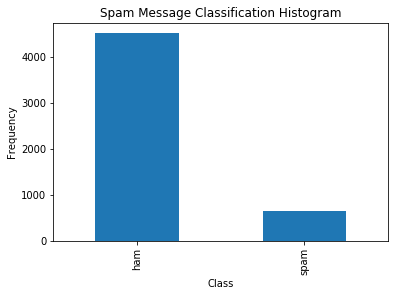

In [114]:
data['class'].value_counts().plot(kind = 'bar')
plt.title("Spam Message Classification Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [115]:
def convertClass(classes):
    if(classes=='spam'):
        return 1
    else:
        return 0
data['class'] = data['class'].apply(convertClass)

In [116]:
data.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
X = data['text']
y = data['class']
from sklearn.model_selection import train_test_split
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
print(X_train.shape,y_train.shape)

(3618,) (3618,)


### Data Exploration 
#### WordClouds- to see which words are common in SPAM and NOT SPAM mesaages

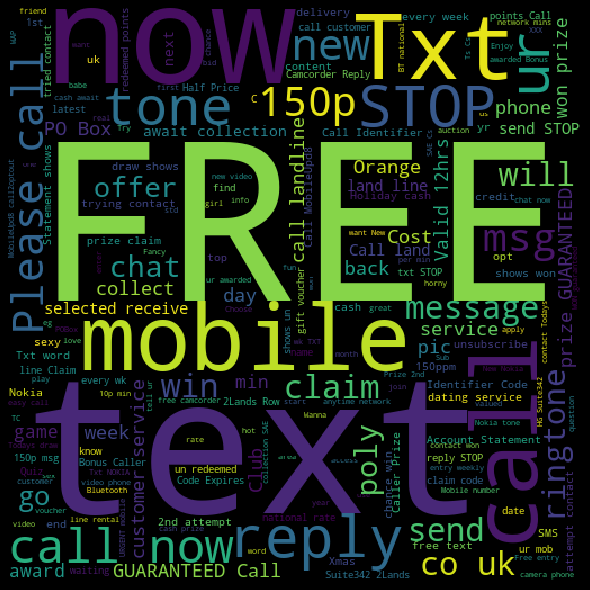

In [119]:
from wordcloud import WordCloud
spam_words= ''.join(list(data[data['class']==1]['text']))
plt.figure(figsize=(10,8), facecolor='k')
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

As expected spam messages mostly contain words like 'Free', 'text', 'call', 'mobile', 'prize clain', 'please call' etc

Now, lets look at the wordcloud representation of ham messages

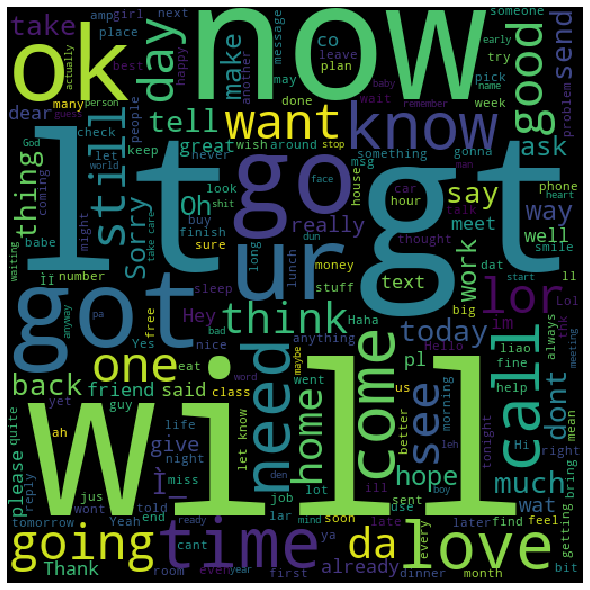

In [120]:
non_spam_words= ''.join(list(data[data['class']==0]['text']))
plt.figure(figsize=(10,8), facecolor='white')
spam_word_cloud = WordCloud(width=512, height=512).generate(non_spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Average Length of Document
Let's see if there's a significant difference between the average of lengths of document for a spam and ham.

In [121]:
spam_data = data[data['class']==1]#data.class not working
non_spam_data = data[data['class']==0]

spam_data_mean = spam_data['text'].str.len().mean()
non_spam_data_mean = non_spam_data['text'].str.len().mean()

print('Average length of document/message for spam messgae : {}'.format(spam_data_mean))
print('Average length of document/message for non spam messgae : {}'.format(non_spam_data_mean))

Average length of document/message for spam messgae : 137.89127105666157
Average length of document/message for non spam messgae : 70.45925597874225


Text(0, 0.5, 'Average length')

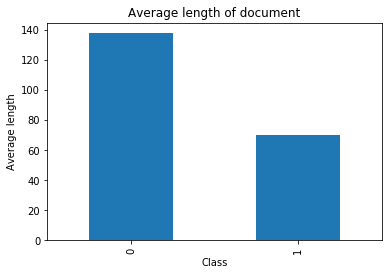

In [122]:
Combine_Doc_Length = pd.DataFrame([spam_data_mean,non_spam_data_mean])
Combine_Doc_Length.plot(kind='bar',legend=False)
plt.title("Average length of document")
plt.xlabel("Class")
plt.ylabel("Average length")

Therefore, we can conclude that this is an important feature and should be considered for building our classifier. We can also observe that spam documents are more verbose that not spam documents.

#### Average number of digits per document

Since, we saw that 'prize claim' and 'call' were popular words used for spam documents, let's see if there is a significant difference between the average no. of digits occuring in spam documents vs not spam documents.

In [123]:
spam_avg_digits_per_doc = spam_data['text'].str.count(r'\d').mean()
not_spam_avg_digits_per_doc = non_spam_data['text'].str.count(r'\d').mean()
print('Average no. of digits per document for spam :',spam_avg_digits_per_doc)
print('Average no. of digits per document for not spam :',not_spam_avg_digits_per_doc)

Average no. of digits per document for spam : 15.447166921898928
Average no. of digits per document for not spam : 0.29030115146147034


           0
0   0.290301
1  15.447167


Text(0.5, 1.0, 'Average number of digit per document')

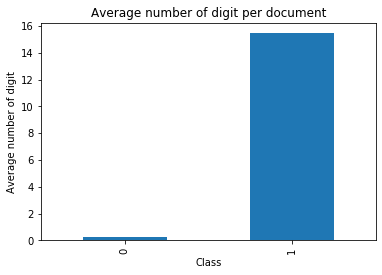

In [124]:
combine_digit_doc = pd.DataFrame([not_spam_avg_digits_per_doc,spam_avg_digits_per_doc])
print(combine_digit_doc)
combine_digit_doc.plot(kind='bar',legend=False)
plt.xlabel('Class')
plt.ylabel('Average number of digit')
plt.title('Average number of digit per document')

Therefore, we can conclude that number of digits per document is also an important feature for classification.

#### Average number of non word characters

Let's also check if average number of non-word characters (anything other than letters, digits) is significantly different for spam and not spam documents.

In [125]:
spam_avg_non_word_chars = spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()
not_spam_avg_non_word_chars = non_spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()

print('Average no. of non word per document for spam:',spam_avg_non_word_chars)
print('Average no. of non word per document for not spam:',not_spam_avg_non_word_chars)

Average no. of non word per document for spam: 24.396630934150078
Average no. of non word per document for not spam: 14.263064658990256


Text(0, 0.5, 'Average no. of non word chars')

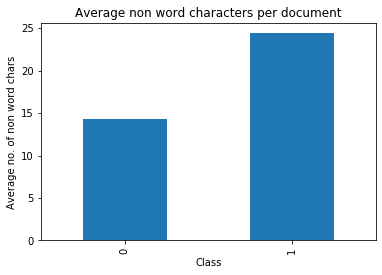

In [126]:
avg_doc_len = pd.DataFrame([not_spam_avg_non_word_chars, spam_avg_non_word_chars])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average non word characters per document")
plt.xlabel("Class")
plt.ylabel("Average no. of non word chars")

As, we see that spam messages tend to have more non word characters as compared to regular messages, we can add this as a feature as well.

### Data Preprocessing
Let's fit and transform training data using Tfidf Vectorizer with default parameters and find 20 features with smallest tf-idfs and 20 features with largest tf-idfs.

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tfidf = TfidfVectorizer(min_df=1)
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit(X_train)
print(X_train.head(2))
# tokenize and build vocab
tfidf.fit(X_train)
# encode the training data
idf = tfidf.idf_
X_train_cv = tfidf.transform(X_train)
X_test_cv = tfidf.transform(X_test)
tfidf_dict = dict(zip(tfidf.get_feature_names(), idf))
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index()
tfidf_df.columns=('token','idf')
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)
print(X_train.head(2))
print(X_train_cv.shape , X_test_cv.shape )

1757                  Miss ya, need ya, want ya, love ya.
1048    I walked an hour 2 c u! doesnåÕt that show I c...
Name: text, dtype: object
1757                  Miss ya, need ya, want ya, love ya.
1048    I walked an hour 2 c u! doesnåÕt that show I c...
Name: text, dtype: object
(3618, 7077) (1551, 7077)



### Multinomial Naive Bayes Classifier
As a baseline, let's build a classfier using Multinomial Naive Bayes algorithm without any additional fetaures.

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

clfrNB = MultinomialNB(alpha=0.1)
clfrNB.fit(X_train_cv, y_train)
y_pred = clfrNB.predict(X_test_cv)
print(roc_auc_score(y_test, y_pred))

0.9515214124718258


In [129]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))

0.9045454545454545


Confusion matrix, without normalization
[[1329    2]
 [  21  199]]


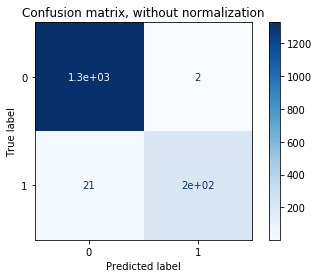

Normalized confusion matrix
[[0.99849737 0.00150263]
 [0.09545455 0.90454545]]


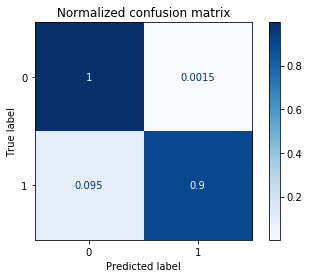

In [130]:
def plot_Confusion_Matrix(classifier,x_test,y_test):
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, x_test, y_test,display_labels=[0,1],cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)
        
        print(title)
        print(disp.confusion_matrix)

        plt.show()
plot_Confusion_Matrix(clfrNB,X_test_cv,y_test)

### Feature Engineering

In [131]:
from scipy.sparse import csr_matrix, hstack
# returns sparse feature matrix with added feature. feature_to_add can also be a list of features.
def add_feature(X, feature_to_add):
    return hstack([X, csr_matrix(feature_to_add).T])

In [132]:
def length_of_doc(X):
    return X.str.len()

def no_of_digits_per_doc(X):
    return X.str.count(r'\d')

def no_of_non_word_chars(X):
    return X.str.count(r'[^a-zA-Z0-9-]+')

In [133]:
doc_len_train = length_of_doc(X_train)
doc_len_test =  length_of_doc(X_test)

digits_per_doc_train = no_of_digits_per_doc(X_train)
digits_per_doc_test = no_of_digits_per_doc(X_test) 

non_word_chars_train = no_of_non_word_chars(X_train)
non_word_chars_test = no_of_non_word_chars(X_test)

X_train_cv = add_feature(X_train_cv, doc_len_train)
X_train_cv = add_feature(X_train_cv, digits_per_doc_train)
X_train_cv = add_feature(X_train_cv, non_word_chars_train)

X_test_cv = add_feature(X_test_cv, doc_len_test)
X_test_cv = add_feature(X_test_cv, digits_per_doc_test)
X_test_cv = add_feature(X_test_cv, non_word_chars_test)

In [134]:
print(X_train_cv.shape,X_test_cv.shape)

(3618, 7080) (1551, 7080)


In [135]:
clfrNB = MultinomialNB(alpha=0.1)
clfrNB.fit(X_train_cv, y_train)
y_pred = clfrNB.predict(X_test_cv)
print(roc_auc_score(y_test, y_pred))

0.948534936138242


0.9090909090909091
Confusion matrix, without normalization
[[1315   16]
 [  20  200]]


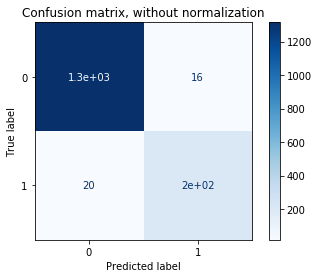

Normalized confusion matrix
[[0.98797896 0.01202104]
 [0.09090909 0.90909091]]


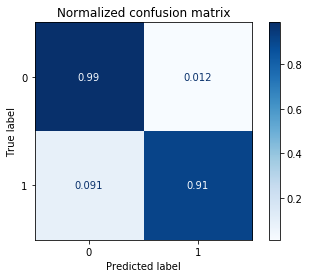

In [136]:
print(recall_score(y_test, y_pred))
plot_Confusion_Matrix(clfrNB,X_test_cv,y_test)

### SVM Classifier

In [137]:
from sklearn.svm import SVC
clfsvm = SVC(C=10000)
clfsvm.fit(X_train_cv, y_train)
y_pred = clfsvm.predict(X_test_cv)
print(roc_auc_score(y_pred, y_test))

0.9911561858951689


0.95
Confusion matrix, without normalization
[[1329    2]
 [  11  209]]


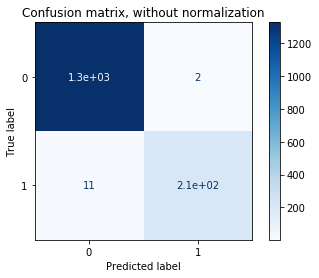

Normalized confusion matrix
[[0.99849737 0.00150263]
 [0.05       0.95      ]]


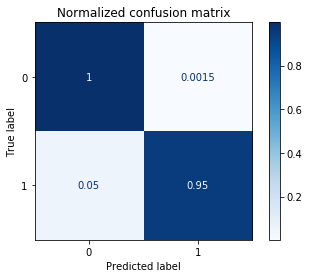

In [138]:
print(recall_score(y_test, y_pred))
plot_Confusion_Matrix(clfsvm,X_test_cv,y_test)

### Logistic Regression Classifier

In [139]:
from sklearn.linear_model import LogisticRegression

clflr = LogisticRegression(C=100)
clflr.fit(X_train_cv, y_train)
y_pred = clflr.predict(X_test_cv)
print(roc_auc_score(y_pred, y_test))

0.9860850817985825


/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9454545454545454
Confusion matrix, without normalization
[[1327    4]
 [  12  208]]


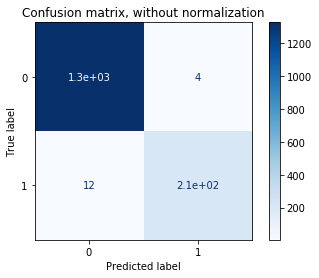

Normalized confusion matrix
[[0.99699474 0.00300526]
 [0.05454545 0.94545455]]


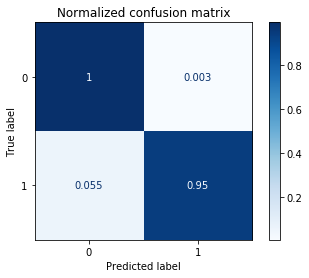

In [140]:
print(recall_score(y_test, y_pred))
plot_Confusion_Matrix(clflr,X_test_cv,y_test)


#### Saving the Best Model

In [141]:
from sklearn.externals import joblib
joblib.dump(clfsvm, 'best.pkl')
print ("Best Model (SVM) Saved")
best = joblib.load('best.pkl')
best

Best Model (SVM) Saved


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Evaluation and Conclusions
In case of spam detection problem, accuracy is not the best measure for evaluating our algorithm as the classes are imbalanced. In this case, our priority is to minimize the False Negatives i.e. an regular message being categorized as Spam. Therefore, our algorithm should have a high recall score = TP / TP + FN.

Let's compare our models below:

<b>Multinomial Naive Bayes without additional features</b>: Accuracy = 93.30%, Recall = 86.65%

<b>Multinomial Naive Bayes with additional features</b>: Accuracy = 95.40%, Recall = 91.78%

<b>SVM Classifier with additional features</b>: Accuracy = 98.45%, Recall = 94.98%

<b>Logistic Regression with additional features</b>: Accuracy = 99.28%, Recall = 93.60%

Although, Logisitic Regression model has the highest accuracy, the SVM classifier has the highest recall and slightly lower accuracy, therefore SVM should be the choice of classifier.